# Medicene Effectiveness and Patiant Satisaction

## data cleaning 

In [2]:
# importing all the libraries needed 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

print("Libraries successfully imported")

Libraries successfully imported


In [3]:
#reading in the csv file 
data = pd.read_csv("C:/Users/Khanya/Downloads/archive (3)/Medicine_Details.csv")
data.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [4]:
data.shape

(11825, 9)

In [5]:
data.describe()

,Excellent Review %,Average Review %,Poor Review %
count,11825.000000,11825.000000,11825.000000
mean,38.516025,35.756364,25.727611
std,25.225343,18.268134,23.991985
min,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,34.000000,35.000000,22.000000
75%,51.000000,47.000000,35.000000
max,100.000000,88.000000,100.000000


In [6]:
data.isnull().sum()

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64

In [13]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11819    False
11820    False
11821    False
11822    False
11823    False
Length: 11741, dtype: bool

In [14]:
data.drop_duplicates(inplace = True)
print("Dropped duplicates")

Dropped duplicates


In [15]:
data.duplicated().sum()

np.int64(0)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11741 entries, 0 to 11823
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11741 non-null  object
 1   Composition         11741 non-null  object
 2   Uses                11741 non-null  object
 3   Side_effects        11741 non-null  object
 4   Image URL           11741 non-null  object
 5   Manufacturer        11741 non-null  object
 6   Excellent Review %  11741 non-null  int64 
 7   Average Review %    11741 non-null  int64 
 8   Poor Review %       11741 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 917.3+ KB


There is no need for the image url column so lets drop it.

In [17]:
del data['Image URL']

## Feature engineering

In [18]:
# creating a satisfaction column that summarises the patient experience.  

data['satisfaction_score'] = data['Excellent Review %'] - data['Poor Review %']
data

,Medicine Name,Composition,Uses,Side_effects,Manufacturer,Excellent Review %,Average Review %,Poor Review %,satisfaction_score
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,Roche Products India Pvt Ltd,22,56,22,0
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,Glaxo SmithKline Pharmaceuticals Ltd,47,35,18,29
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,Alembic Pharmaceuticals Ltd,39,40,21,18
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,Glenmark Pharmaceuticals Ltd,24,41,35,-11
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,Cadila Pharmaceuticals Ltd,34,37,29,5
...,...,...,...,...,...,...,...,...,...
11819,Zenegra Lido Spray,Lidocaine (9.5% w/w),Local anesthesia (Numb tissues in a specific ...,Allergic reaction Application site reactions b...,Alkem Laboratories Ltd,24,19,57,-33
11820,Zilarta-CT 40/6.25 Tablet,Azilsartan medoxomil (40mg) + Chlorthalidone (...,Hypertension (high blood pressure),Dizziness Tiredness Decreased potassium level ...,Micro Labs Ltd,67,33,0,67
11821,Zipcoz Tablet,Chromium Picolinate (100mcg) + D-Chiro Inosito...,Polycystic ovarian syndrome (PCOS),Rash Nausea Paresthesia tingling or pricking s...,Lifeline Remedies India Pvt Ltd,0,80,20,-20
11822,Zestasil 100 Tablet,Sildenafil (100mg),Treatment of Erectile dysfunction,Flushing sense of warmth in the face ears neck...,TBG pharma ltd,25,75,0,25


In [19]:
# Creating a high risk column to identify risky medicine 
# binary classification
data['High_risk'] = (data['Poor Review %'] >= 30).astype(int)
data

,Medicine Name,Composition,Uses,Side_effects,Manufacturer,Excellent Review %,Average Review %,Poor Review %,satisfaction_score,High_risk
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,Roche Products India Pvt Ltd,22,56,22,0,0
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,Glaxo SmithKline Pharmaceuticals Ltd,47,35,18,29,0
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,Alembic Pharmaceuticals Ltd,39,40,21,18,0
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,Glenmark Pharmaceuticals Ltd,24,41,35,-11,1
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,Cadila Pharmaceuticals Ltd,34,37,29,5,0
...,...,...,...,...,...,...,...,...,...,...
11819,Zenegra Lido Spray,Lidocaine (9.5% w/w),Local anesthesia (Numb tissues in a specific ...,Allergic reaction Application site reactions b...,Alkem Laboratories Ltd,24,19,57,-33,1
11820,Zilarta-CT 40/6.25 Tablet,Azilsartan medoxomil (40mg) + Chlorthalidone (...,Hypertension (high blood pressure),Dizziness Tiredness Decreased potassium level ...,Micro Labs Ltd,67,33,0,67,0
11821,Zipcoz Tablet,Chromium Picolinate (100mcg) + D-Chiro Inosito...,Polycystic ovarian syndrome (PCOS),Rash Nausea Paresthesia tingling or pricking s...,Lifeline Remedies India Pvt Ltd,0,80,20,-20,0
11822,Zestasil 100 Tablet,Sildenafil (100mg),Treatment of Erectile dysfunction,Flushing sense of warmth in the face ears neck...,TBG pharma ltd,25,75,0,25,0


In [20]:
# Creating a ingredient count based on the composition count. 
data['Ingredient_count'] = data['Composition'].apply(
    lambda x: x.count('+') + 1 if x != '' else 0
)
data

,Medicine Name,Composition,Uses,Side_effects,Manufacturer,Excellent Review %,Average Review %,Poor Review %,satisfaction_score,High_risk,Ingredient_count
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,Roche Products India Pvt Ltd,22,56,22,0,0,1
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,Glaxo SmithKline Pharmaceuticals Ltd,47,35,18,29,0,2
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,Alembic Pharmaceuticals Ltd,39,40,21,18,0,1
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,Glenmark Pharmaceuticals Ltd,24,41,35,-11,1,3
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,Cadila Pharmaceuticals Ltd,34,37,29,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...
11819,Zenegra Lido Spray,Lidocaine (9.5% w/w),Local anesthesia (Numb tissues in a specific ...,Allergic reaction Application site reactions b...,Alkem Laboratories Ltd,24,19,57,-33,1,1
11820,Zilarta-CT 40/6.25 Tablet,Azilsartan medoxomil (40mg) + Chlorthalidone (...,Hypertension (high blood pressure),Dizziness Tiredness Decreased potassium level ...,Micro Labs Ltd,67,33,0,67,0,2
11821,Zipcoz Tablet,Chromium Picolinate (100mcg) + D-Chiro Inosito...,Polycystic ovarian syndrome (PCOS),Rash Nausea Paresthesia tingling or pricking s...,Lifeline Remedies India Pvt Ltd,0,80,20,-20,0,4
11822,Zestasil 100 Tablet,Sildenafil (100mg),Treatment of Erectile dysfunction,Flushing sense of warmth in the face ears neck...,TBG pharma ltd,25,75,0,25,0,1


In [21]:
# creating a composition complexity based on the ingredient count
def complexity(n):
    if n == 1: 
        return 'Single'
    elif n == 2:
        return 'Combination'
    else: 
        return 'Multi-Combination'

data['Complexity'] = data['Ingredient_count'].apply(complexity)
data

,Medicine Name,Composition,Uses,Side_effects,Manufacturer,Excellent Review %,Average Review %,Poor Review %,satisfaction_score,High_risk,Ingredient_count,Complexity
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,Roche Products India Pvt Ltd,22,56,22,0,0,1,Single
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,Glaxo SmithKline Pharmaceuticals Ltd,47,35,18,29,0,2,Combination
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,Alembic Pharmaceuticals Ltd,39,40,21,18,0,1,Single
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,Glenmark Pharmaceuticals Ltd,24,41,35,-11,1,3,Multi-Combination
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,Cadila Pharmaceuticals Ltd,34,37,29,5,0,1,Single
...,...,...,...,...,...,...,...,...,...,...,...,...
11819,Zenegra Lido Spray,Lidocaine (9.5% w/w),Local anesthesia (Numb tissues in a specific ...,Allergic reaction Application site reactions b...,Alkem Laboratories Ltd,24,19,57,-33,1,1,Single
11820,Zilarta-CT 40/6.25 Tablet,Azilsartan medoxomil (40mg) + Chlorthalidone (...,Hypertension (high blood pressure),Dizziness Tiredness Decreased potassium level ...,Micro Labs Ltd,67,33,0,67,0,2,Combination
11821,Zipcoz Tablet,Chromium Picolinate (100mcg) + D-Chiro Inosito...,Polycystic ovarian syndrome (PCOS),Rash Nausea Paresthesia tingling or pricking s...,Lifeline Remedies India Pvt Ltd,0,80,20,-20,0,4,Multi-Combination
11822,Zestasil 100 Tablet,Sildenafil (100mg),Treatment of Erectile dysfunction,Flushing sense of warmth in the face ears neck...,TBG pharma ltd,25,75,0,25,0,1,Single


# EDA 

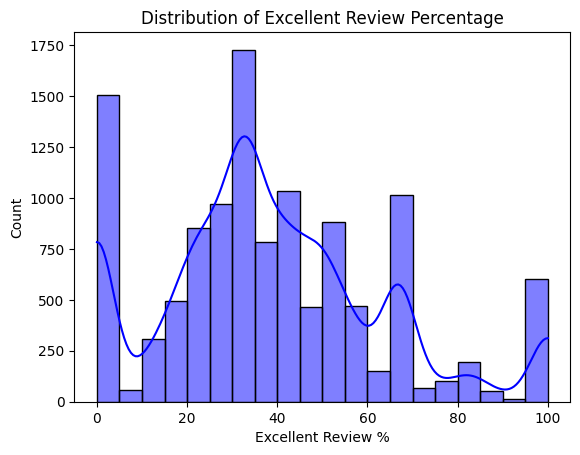

In [22]:
sns.histplot(data['Excellent Review %'], bins=20, kde = True, color = 'blue')
plt.title("Distribution of Excellent Review Percentage")
plt.show()

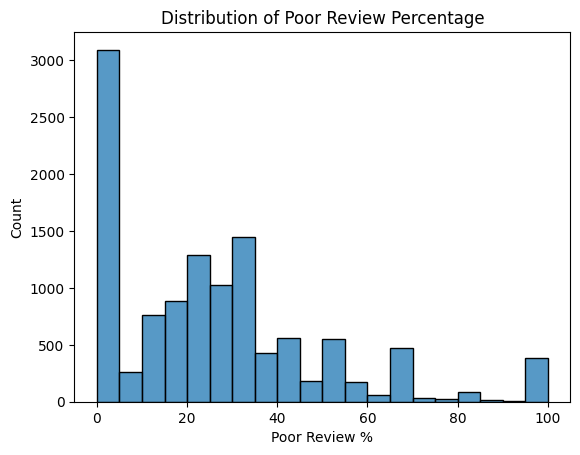

In [23]:
sns.histplot(data['Poor Review %'], bins=20)
plt.title("Distribution of Poor Review Percentage")
plt.show()

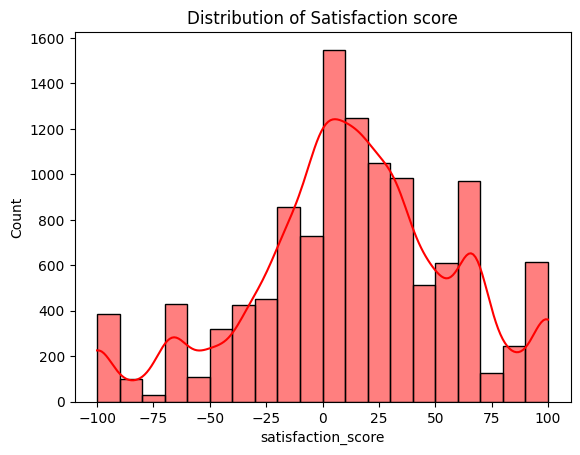

In [24]:
sns.histplot(data['satisfaction_score'], bins=20, color = 'red', kde = True)
plt.title("Distribution of Satisfaction score")
plt.show()

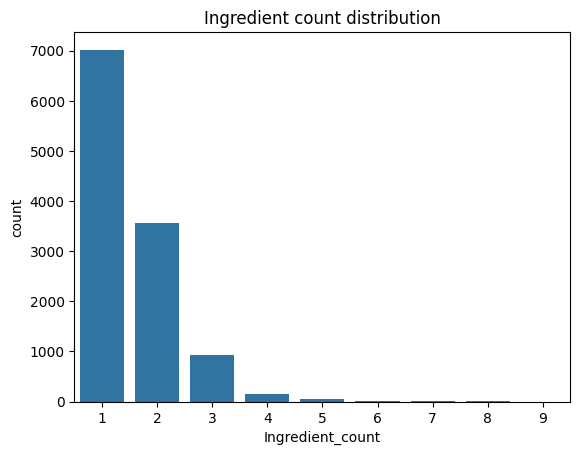

In [25]:
sns.countplot(x = 'Ingredient_count', data = data)
plt.title('Ingredient count distribution')
plt.show()

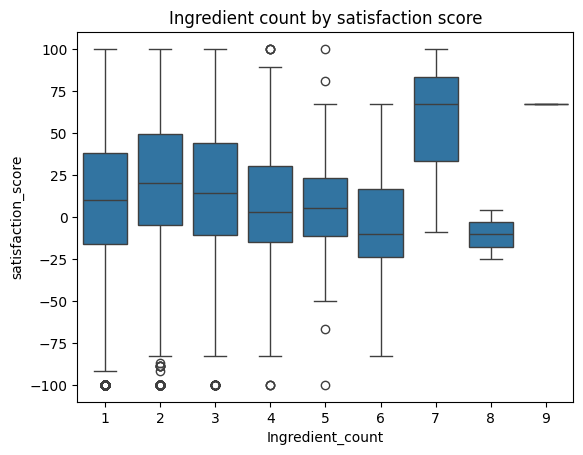

In [26]:
sns.boxplot(x = 'Ingredient_count', y = 'satisfaction_score', data = data)
plt.title('Ingredient count by satisfaction score')
plt.show()

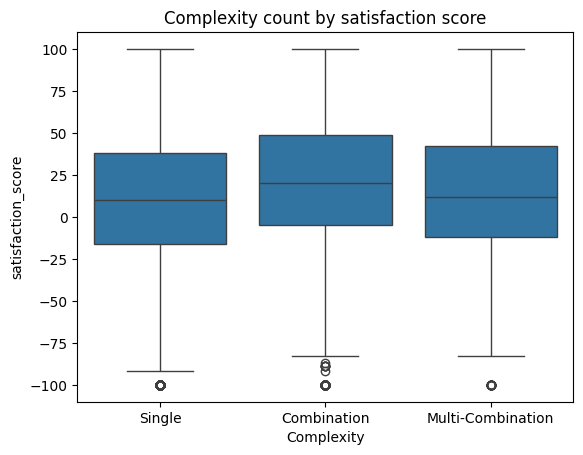

In [27]:
sns.boxplot(x = 'Complexity', y = 'satisfaction_score', data = data)
plt.title('Complexity count by satisfaction score')
plt.show()

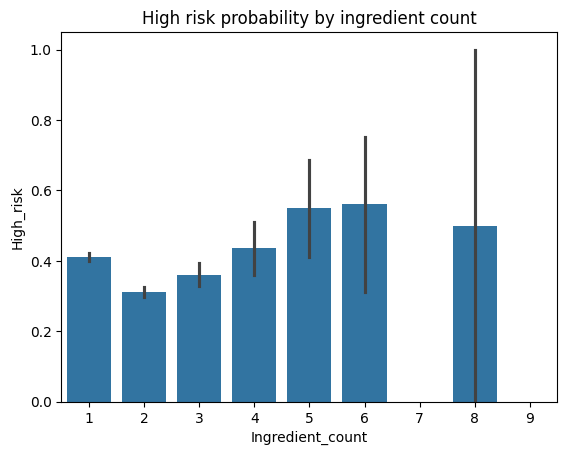

In [28]:
sns.barplot(x = 'Ingredient_count', y = 'High_risk', data = data)
plt.title('High risk probability by ingredient count')
plt.show()

In [29]:
import matplotlib.pyplot as plt

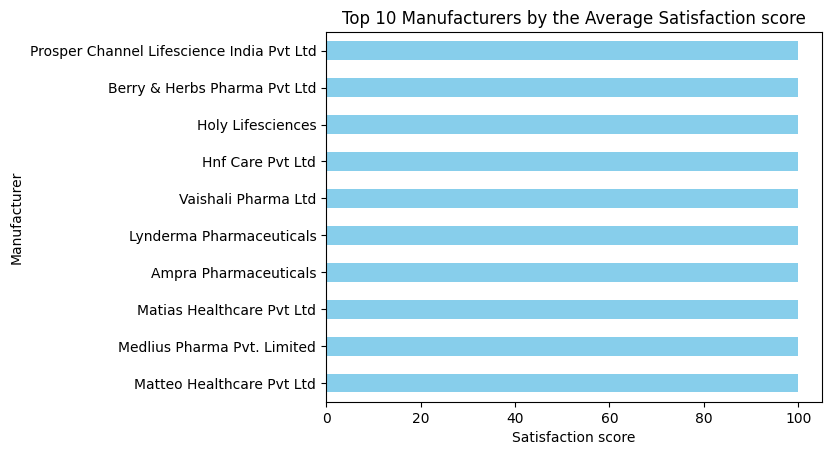

In [30]:
top_manuf = data.groupby('Manufacturer')['satisfaction_score'].mean().sort_values(ascending = False).head(10)

top_manuf.plot(kind = 'barh', color = 'skyblue')
plt.title("Top 10 Manufacturers by the Average Satisfaction score")
plt.xlabel("Satisfaction score")
plt.show()

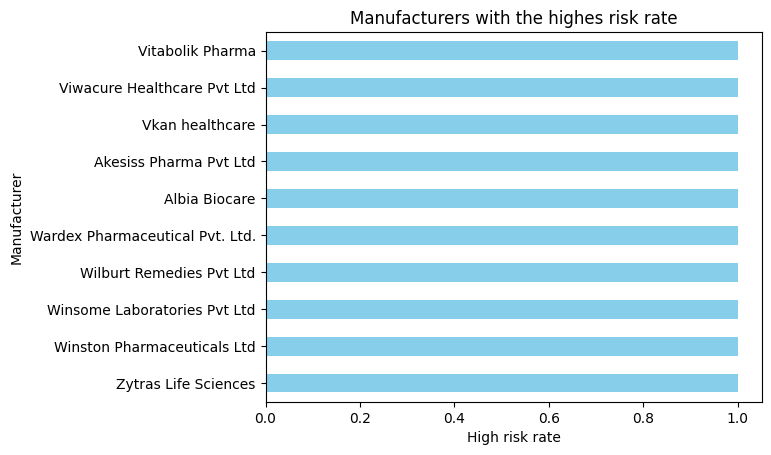

In [31]:
risky_manu = data.groupby('Manufacturer')['High_risk'].mean().sort_values(ascending = False).head(10)

risky_manu.plot(kind = 'barh', color = 'skyblue')
plt.title("Manufacturers with the highes risk rate")
plt.xlabel("High risk rate")
plt.show()

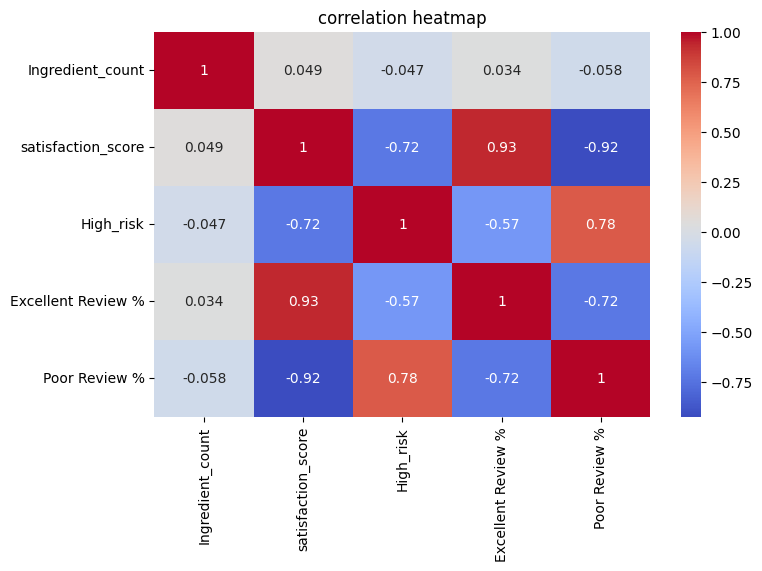

In [32]:
data_corr = data[['Ingredient_count', 'satisfaction_score', 'High_risk', 'Excellent Review %', 'Poor Review %']].corr()
plt.figure(figsize=(8,5))
sns.heatmap(data_corr, annot = True, cmap= 'coolwarm')
plt.title('correlation heatmap')
plt.show()

In [33]:
# using nlp to find common words
from wordcloud import WordCloud

print("successful")

successful


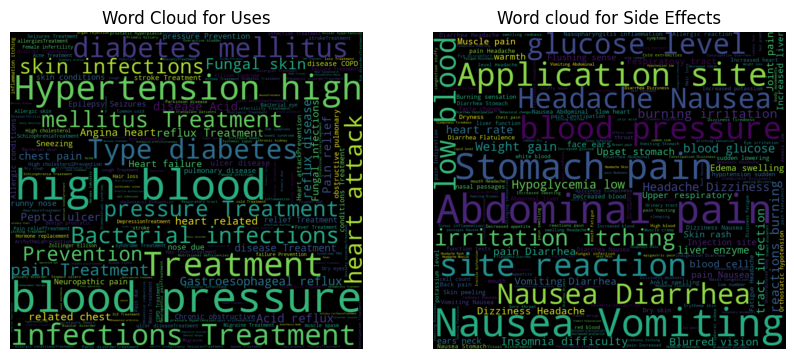

In [34]:
# Using Natural Language Processing to find common words 
uses_text = ' '.join(data['Uses'].values) # Basically joining all the words in the uses column
wordclouduses = WordCloud(width = 1000, height = 900, background_color = 'black').generate(uses_text) # generating the word cloud for uses 

sideeffects_text = ' '.join(data['Side_effects'].values) # joing all the words in the side effects column 
wordcloudside = WordCloud(width = 1000, height = 900, background_color = 'black').generate(sideeffects_text) #@ generating the wword cloud for side effects 

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(wordclouduses, interpolation = 'bilinear')
plt.title('Word Cloud for Uses')
plt.axis('Off')


plt.subplot(1,2,2)
plt.imshow(wordcloudside, interpolation = 'bilinear')
plt.title('Word cloud for Side Effects')
plt.axis('Off')

plt.show()

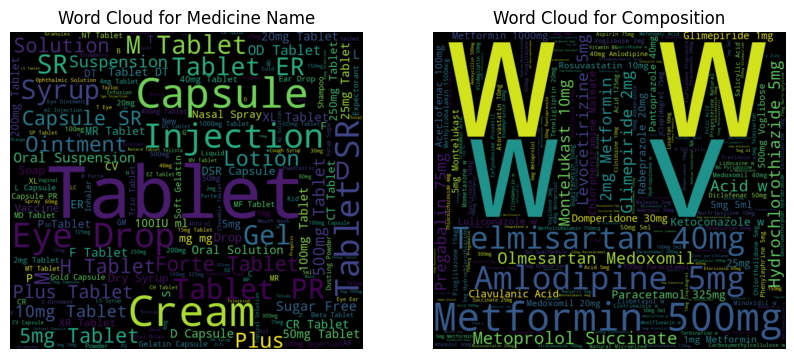

In [35]:
medi_text = ' '.join(data['Medicine Name'].values)
wordcloudmedi = WordCloud(width =1000, height = 900, background_color = 'black').generate(medi_text)

comp_text = ' '.join(data['Composition'].values)
wordcloudcomp = WordCloud(width =1000, height =900, background_color = 'black').generate(comp_text)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(wordcloudmedi, interpolation = 'bilinear')
plt.title('Word Cloud for Medicine Name')
plt.axis('Off')

plt.subplot(1,2,2)
plt.imshow(wordcloudcomp, interpolation = 'bilinear')
plt.title('Word Cloud for Composition')
plt.axis('Off')

plt.show()


# Some Light Machine Learning 

It is a binary classification problem 
## can we predict whether medication is high risk based on its composition and reviews? 
so we will used logistic regression because it is easy to interpret and has coeffients that will be very easy to explain


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      2195
           1       0.75      0.62      0.68      1328

    accuracy                           0.78      3523
   macro avg       0.77      0.75      0.75      3523
weighted avg       0.78      0.78      0.77      3523

Logistic Regression model accuracy: 77.86%


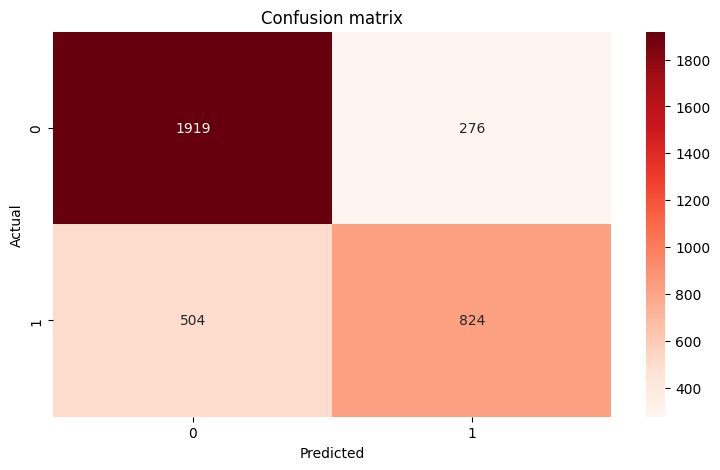

In [43]:
y = data['High_risk']
x = data[['Ingredient_count', 'Excellent Review %']]
# I am tying to avoid data leakage hence why i did not use poor reviews( too obvious), satisfaction score


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state = 42, stratify=y)

model = LogisticRegression(max_iter = 10000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
#print("Accuracy:", accuracy_score(y_test, y_pred))
acc = accuracy_score(y_test, y_pred) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")


# Confusion Matric 
confm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,5))
sns.heatmap(confm, annot=True, fmt ='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()



In [ ]:
data.to_csv("11000_Med_cleaned_data.csv", index=False)
print("Successful")